In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from scipy.stats import linregress
from IPython.display import display

from plot_funcs import get_results, get_ranks_sizes, get_highest_performing_df, add_extra_ticks
from funcs import save_stats_summary
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/home/sage/anaconda3/envs/bpt/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
results = get_results('../exp/results')

Found: 87390 Incomplete: 0


### Introducing some special ensembles over collections of existing parcellations

Focus on just one subset at once

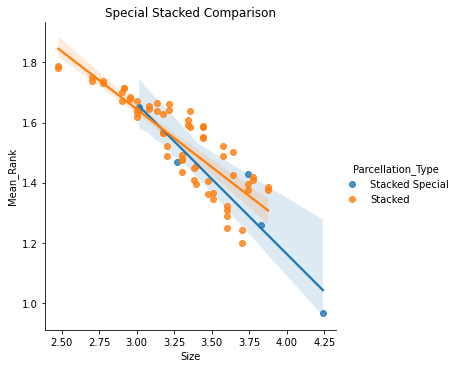

In [3]:
r_df = get_ranks_sizes(results,
                       stacked=True,
                       add_special=True,
                       log=True,
                       threshold=False)

sns.lmplot(x='Size', y='Mean_Rank', hue='Parcellation_Type', data=r_df)
plt.title('Special Stacked Comparison')
plt.savefig('Figures/special_stacking.png', dpi=200, bbox_inches='tight')

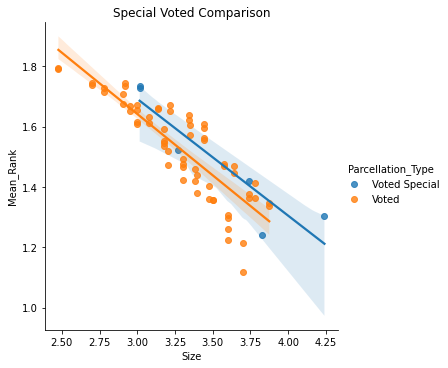

In [4]:
r_df = get_ranks_sizes(results,
                       voted=True,
                       add_special=True,
                       log=True,
                       threshold=False)

sns.lmplot(x='Size', y='Mean_Rank', hue='Parcellation_Type', data=r_df)
plt.title('Special Voted Comparison')
plt.savefig('Figures/special_voting.png', dpi=200, bbox_inches='tight')

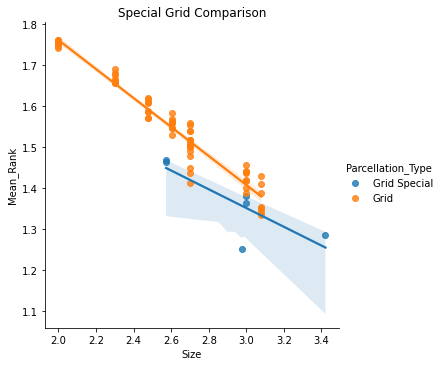

In [5]:
r_df = get_ranks_sizes(results,
                       grid=True,
                       add_special=True,
                       log=True,
                       threshold=False)

sns.lmplot(x='Size', y='Mean_Rank', hue='Parcellation_Type', data=r_df)
plt.title('Special Grid Comparison')
plt.savefig('Figures/special_grid.png', dpi=200, bbox_inches='tight')

### Modified Highest Performing

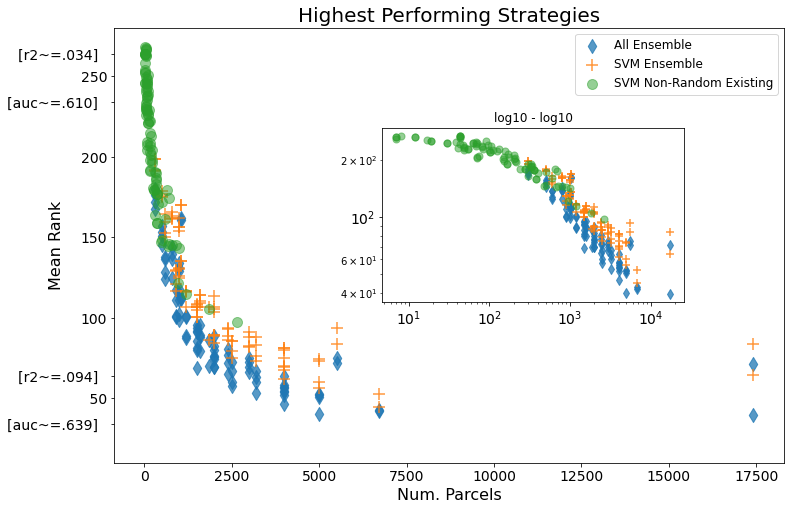

In [6]:
# Get scores df
scores = get_highest_performing_df(results, add_special=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

plt.title('Highest Performing Strategies', fontsize=20)
axins = inset_axes(ax, width="45%", height="40%", borderpad=10)
plt.title('log10 - log10', fontsize=12)

for i, a in enumerate([ax, axins]):
    
    j = i + 1
    
    if i == 1:
        a.set_xscale('log')
        a.set_yscale('log')

    a.scatter(scores.loc['all', 'Size'],
              scores.loc['all', 'Mean_Rank'],
              label='All Ensemble', s=100 // j, marker='d', alpha=.75)

    a.scatter(scores.loc['svm', 'Size'],
              scores.loc['svm', 'Mean_Rank'],
              label='SVM Ensemble', s=125 // j, marker='+', alpha=.8)

    a.scatter(scores.loc['existing', 'Size'],
              scores.loc['existing', 'Mean_Rank'],
              label='SVM Non-Random Existing', s=100 // j, alpha=.5)
    
ax.set_ylabel('Mean Rank', fontsize=16)
ax.set_xlabel('Num. Parcels', fontsize=16)


# Add custom ticks
ref = scores.copy().set_index('Parcellation')

add_extra_ticks(ax, ref, r2_extra_ticks=[264, 64],
                         roc_extra_ticks=[234, 34])

# Sizes
ax.legend(fontsize=12)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
axins.xaxis.set_tick_params(labelsize=14)
axins.yaxis.set_tick_params(labelsize=14)

ax.set_ylim(bottom=10, top=280)
plt.savefig('Figures/special_highest.png', dpi=300, bbox_inches='tight')